# Import libraries

In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from utils import *

# Parameters

In [5]:
fig_dir = 'data/figure'
exp_name = 'compare_group_size'
time_path = 'data/time/compare_group_size_2020_12_11_1_15_52.npy'
cost_path = 'data/cost/compare_group_size_2020_12_11_1_15_52.npy'
methods = ['greedy', 'approx', 'approx_woc']
sizes = np.arange(4, 18, step=2)
repeats = len(sizes)

# Load data

In [6]:
%%time
run_time = np.load(time_path)
travel_cost = np.load(cost_path)
print(run_time.shape, travel_cost.shape)

(21,) (21,)
Wall time: 5.97 ms


# Convert to DataFrame

In [7]:
df_time = pd.DataFrame(run_time.reshape(repeats,-1)/np.power(10,6), columns=methods)
df_time.loc[:, 'size'] = sizes
print(df_time.shape)
print(df_time.info())
display(df_time)

(7, 4)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   greedy      7 non-null      float64
 1   approx      7 non-null      float64
 2   approx_woc  7 non-null      float64
 3   size        7 non-null      int32  
dtypes: float64(3), int32(1)
memory usage: 324.0 bytes
None


,greedy,approx,approx_woc,size
0,0.000000,0.110951,0.080789,4
1,0.000199,0.229653,0.079408,6
2,0.000000,0.576762,0.083028,8
3,0.000000,0.795666,0.086494,10
4,0.000000,1.676185,0.080293,12
5,0.000000,5.124670,0.078403,14
6,0.000000,30.639103,0.097663,16


In [8]:
df_cost =  pd.DataFrame(travel_cost.reshape(repeats,-1), columns=methods)
df_cost.loc[:, 'size'] = sizes
print(df_cost.shape)
print(df_cost.info())
display(df_cost)

(7, 4)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   greedy      7 non-null      float64
 1   approx      7 non-null      float64
 2   approx_woc  7 non-null      float64
 3   size        7 non-null      int32  
dtypes: float64(3), int32(1)
memory usage: 324.0 bytes
None


,greedy,approx,approx_woc,size
0,10903.9,9240.8,9193.8,4
1,10903.9,8920.2,9193.8,6
2,10903.9,8823.0,9193.8,8
3,10903.9,8836.5,9193.8,10
4,10903.9,8689.7,9193.8,12
5,10903.9,8835.5,9193.8,14
6,10903.9,8626.2,9193.8,16


# Calculate metrics 

## Processing time

In [9]:
df_time.mean()

greedy         0.000028
approx         5.593284
approx_woc     0.083725
size          10.000000
dtype: float64

## Ride-sharing efficiency

In [10]:
df_cost.loc[:, 'approx_gain'] = df_cost['greedy']/df_cost['approx']
df_cost.loc[:, 'approx_woc_gain'] = df_cost['greedy']/df_cost['approx_woc']
display(df_cost)

,greedy,approx,approx_woc,size,approx_gain,approx_woc_gain
0,10903.9,9240.8,9193.8,4,1.179974,1.186006
1,10903.9,8920.2,9193.8,6,1.222383,1.186006
2,10903.9,8823.0,9193.8,8,1.235849,1.186006
3,10903.9,8836.5,9193.8,10,1.233961,1.186006
4,10903.9,8689.7,9193.8,12,1.254807,1.186006
5,10903.9,8835.5,9193.8,14,1.234101,1.186006
6,10903.9,8626.2,9193.8,16,1.264044,1.186006


In [11]:
df_cost[['approx_gain', 'approx_woc_gain']].mean()

approx_gain        1.232160
approx_woc_gain    1.186006
dtype: float64

In [12]:
df_cost[['greedy', 'approx', 'approx_woc']].mean()

greedy        10903.900000
approx         8853.128571
approx_woc     9193.800000
dtype: float64

# Plots

## Processing time

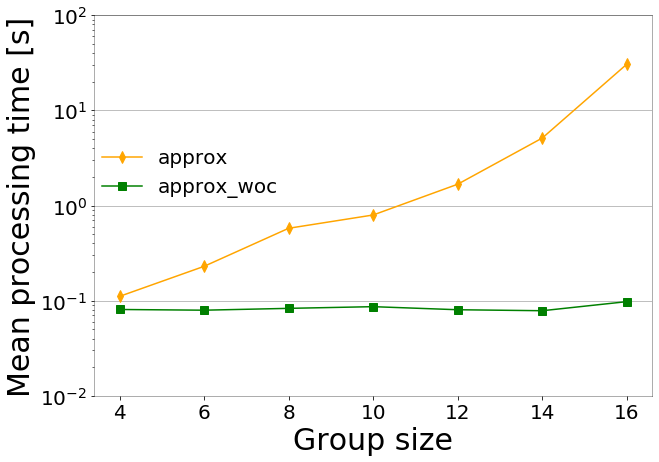

In [13]:
plot_proc_time(
    df_time, 
    sizes, 
    exp_name, 
    ylim=(10**-2, 10**2), 
    xlabel='Group size'
)

## Travel cost

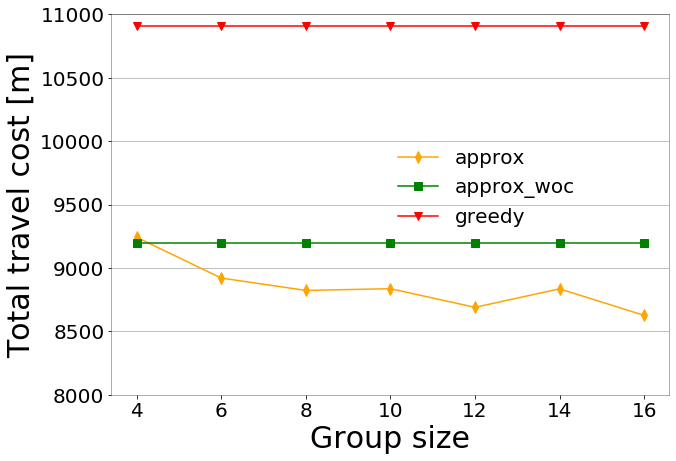

In [14]:
plot_travel_cost(
    df_cost, 
    sizes, 
    exp_name, 
    ylim=(8000,11000), 
    xlabel='Group size', 
    legend_loc=(0.5, 0.42)
)

## Ride-sharing efficiency

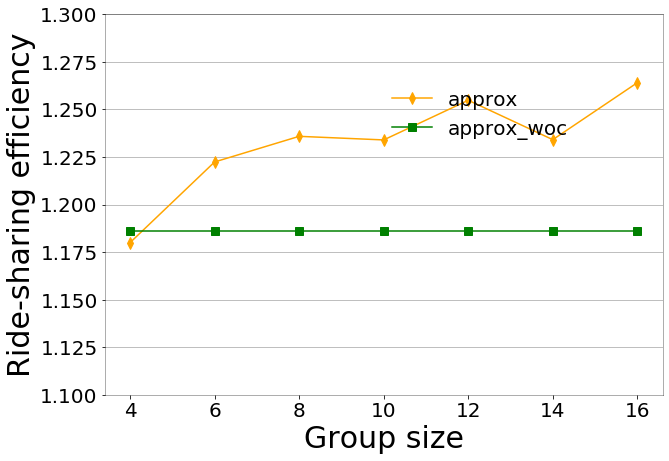

In [15]:
plot_rs_efficiency(
    df_cost, 
    sizes, 
    exp_name, 
    ylim=(1.1,1.3), 
    xlabel='Group size', 
    legend_loc=(0.5, 0.65)
)